In [19]:
import re
import math
import string
from collections import Counter
import requests
import random
import matplotlib.pyplot as plt


In [11]:
# parsing the data
TEXT = requests.get('https://norvig.com/big.txt').text
len(TEXT)

6488666

In [3]:
#The text is huge - over 6 million characters.
#Now I need to break the text into words (or, to be a bit more formal, tokens). 
# For now, I won't think much about the fact that the text contains punctuation, numbers and other symbols
def tokens(text):
    """Returns a list of tokens (consecutive letter sequences) in the text. 
       The text is converted to lower case."""
    return re.findall(r'[a-z]+', text.lower()) 

In [4]:
tokens('This is: A test, 1, 2, 3, this is.')

['this', 'is', 'a', 'test', 'this', 'is']

In [5]:
WORDS = tokens(TEXT)
len(WORDS)

1105285

In [12]:
# here are a million different words left.  Here are the first 10:
print(WORDS[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'sherlock', 'holmes']


In [14]:
#We can use this list as a generative model of the text.
#In the bag-of-words model, we completely ignore the order of words, but observe their frequency. 
#Almost certainly the resulting sentence will be grammatically incorrect, but the words in that sentence will be in the approximatly  correct proportion 
#(more frequent ones will occur more often, rarer ones less often). 
def sample(bag, n=10):
    "Sample a random n-word sentence from the model described by the bag of words."
    return ' '.join(random.choice(bag) for _ in range(n))

In [10]:
sample(WORDS)

'town next federation gossip there room upper example idol it'

In [15]:
#Another representation of a bag of words is Counter. It is a dictionary consisting of pairs {'word': number of occurrences of the word in the text}. 
Counter(tokens('Is this a test? It is a test!'))

Counter({'is': 2, 'a': 2, 'test': 2, 'this': 1, 'it': 1})

In [16]:
COUNTS = Counter(WORDS)

print(COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [17]:
for w in tokens('the rare and neverbeforeseen words'):
    print(COUNTS[w], w)

80030 the
83 rare
38313 and
0 neverbeforeseen
460 words


In [24]:
#In 1935, linguist George Zipf observed that the most frequent word in a text appears with a frequency inverse to its ordinal number. 
#This observation, known as Zipf's Law, was made earlier by Felix Auerbach in 1913. 
#If we plot the frequencies of words on a logarithmic scale, they should approximate a straight line, confirming this law.

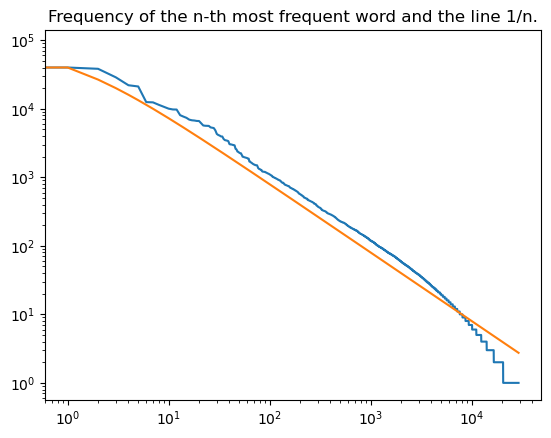

In [23]:
M = COUNTS['the']
plt.yscale('log')
plt.xscale('log')
plt.title('Frequency of the n-th most frequent word and the line 1/n.')
plt.plot([c for (w, c) in COUNTS.most_common()])
plt.plot([M/i for i in range(1, len(COUNTS)+1)])
plt.show()

In [25]:
#Let's take a naive approach: we will always take the closest word, if the proximity check is not enough, 
#we will take the word with the maximum frequency from WORDS. Now we will measure proximity using the Levenshtein distance: 
#the minimum number of deletions, permutations, insertions, and character substitutions required to turn one word into another word

In [26]:
def correct(word):
    "Finding the best error correction for a given word."
    # pre-calculate edit_distance==0, then 1, then 2; otherwise leave the word as is.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=COUNTS.get)

In [27]:
def known(words):
    "Return a subset of the words we have in our dictionary."
    return {w for w in words if w in COUNTS}

def edits0(word): 
    "Return all strings that are at edit_distance == 0 from word (i.e., just the word itself)."
    return {word}

def edits2(word):
    "Return all rows that are at edit_distance == 2 from word."
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

In [28]:
def edits1(word):
    "Returns a list of all rows at edit_distance == 1 from word."
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def splits(word):
    "Returns a list of all possible splits of a word into a pair (a, b)."
    return [(word[:i], word[i:]) 
            for i in range(len(word)+1)]

alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [29]:
splits('wird')

[('', 'wird'), ('w', 'ird'), ('wi', 'rd'), ('wir', 'd'), ('wird', '')]

In [30]:
len(alphabet)

26

In [31]:
print(edits0('wird'))

{'wird'}


In [32]:
print(edits1('wird'))

{'wiurd', 'tird', 'wfird', 'wirdx', 'wired', 'wurd', 'gird', 'nwird', 'wvird', 'wifrd', 'wirxd', 'wiyd', 'wisd', 'wirdh', 'wirm', 'wikrd', 'wirjd', 'bird', 'wirt', 'wpird', 'wirid', 'wied', 'awird', 'iwird', 'wxird', 'jwird', 'wihrd', 'xird', 'wirzd', 'mird', 'qird', 'wirh', 'wbird', 'wirg', 'wirj', 'wirdw', 'wikd', 'wijrd', 'wiird', 'wcrd', 'wirdc', 'wirbd', 'widd', 'wwird', 'wgird', 'wirnd', 'wirdj', 'wijd', 'wirdo', 'wihd', 'wrird', 'bwird', 'wirdm', 'wirdt', 'wjird', 'twird', 'wsird', 'zwird', 'wicd', 'wimrd', 'wirwd', 'wprd', 'wirk', 'wmrd', 'swird', 'wixrd', 'wvrd', 'wsrd', 'wiqd', 'wirld', 'cird', 'wirkd', 'wrid', 'wir', 'fwird', 'wnird', 'yird', 'wqrd', 'wirdf', 'wirdp', 'hwird', 'widr', 'nird', 'iwrd', 'werd', 'wiro', 'waird', 'wirrd', 'wirdr', 'witd', 'pwird', 'wiru', 'wiod', 'wiid', 'wiad', 'wiwd', 'wirx', 'wigrd', 'wirdi', 'lird', 'wiyrd', 'wid', 'wirw', 'wirdg', 'wirz', 'wirgd', 'wirr', 'word', 'wild', 'wirc', 'wirde', 'wirdn', 'wilrd', 'oird', 'uird', 'wirl', 'wirq', 'wib

In [33]:
print(len(edits2('wird')))

24254


In [34]:
tokens('Speling errurs in somethink. Whutever; unusuel misteakes everyware?')

['speling',
 'errurs',
 'in',
 'somethink',
 'whutever',
 'unusuel',
 'misteakes',
 'everyware']

In [35]:
list(map(correct, tokens('Speling errurs in somethink. Whutever; unusuel misteakes everyware?')))

['spelling',
 'errors',
 'in',
 'something',
 'whatever',
 'unusual',
 'mistakes',
 'everywhere']

In [36]:
def correct_text(text):
    return re.sub('[a-zA-Z]+', correct_match, text)

def correct_match(match):
    word = match.group()
    return case_of(word)(correct(word.lower()))

def case_of(text):
    return (str.upper if text.isupper() else
            str.lower if text.islower() else
            str.title if text.istitle() else
            str)

In [37]:
str('fhgwdjksa')

'fhgwdjksa'

In [38]:
list(map(case_of, ['UPPER', 'lower', 'Title', 'CamelCase']))

[<method 'upper' of 'str' objects>,
 <method 'lower' of 'str' objects>,
 <method 'title' of 'str' objects>,
 str]

In [39]:
correct_text('Speling Errurs IN somethink. Whutever; unusuel misteakes?')

'Spelling Errors IN something. Whatever; unusual mistakes?'

In [40]:
correct_text('Audiance sayzs: tumblr ...')

'Audience says: tumbler ...'

In [41]:
# I will calculate the probabilities of words using the function pdist, 
#which takes Counter (our bag of words) as input and returns a function that acts as a probability distribution on the set of all possible words. 
#In a probability distribution, the probability of each word is between 0 and 1, and adding the probabilities of all words gives 1.


In [44]:
def pdist(counter):
    N = sum(list(counter.values()))
    return lambda x: counter[x]/N

P = pdist(COUNTS)

In [45]:
for w in tokens('"The" is the most common word in English'):
    print(P(w), w)

0.07240666434449033 the
0.008842968103249388 is
0.07240666434449033 the
0.0008215075749693518 most
0.0002596615352601365 common
0.0002696137195383996 word
0.019949605757790978 in
0.00019090098933759167 english


In [47]:
def Pwords(words):
    "Probabilities of words, provided they are independent."
    return product(P(w) for w in words)

def product(nums):
    "Let's multiply the numbers.  (It's like `sum`, only with multiplication.)"
    result = 1
    for x in nums:
        result *= x
    return result

In [48]:
tests = ['this is a test', 
         'this is a unusual test',
         'this is a neverbeforeseen test']

for test in tests:
    print(Pwords(tokens(test)), test)

2.983396332800731e-11 this is a test
8.637472023018802e-16 this is a unusual test
0.0 this is a neverbeforeseen test


In [49]:
# use memoization
def memo(f):
    cache = {}
    def fmemo(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    fmemo.cache = cache
    return fmemo

In [50]:
max(len(w) for w in COUNTS)

18

In [51]:
def splits(text, start=0, L=20):
    "Вернуть список всех пар (a, b); start <= len(a) <= L."
    return [(text[:i], text[i:]) 
            for i in range(start, min(len(text), L)+1)]

In [52]:
print(splits('word'))
print(splits('reallylongtext', 1, 4))

[('', 'word'), ('w', 'ord'), ('wo', 'rd'), ('wor', 'd'), ('word', '')]
[('r', 'eallylongtext'), ('re', 'allylongtext'), ('rea', 'llylongtext'), ('real', 'lylongtext')]


In [53]:
@memo
def segment(text):
    "Return a list of words that is the most likely segmentation of our text."
    if not text: 
        return []
    else:
        candidates = ([first] + segment(rest) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=Pwords)

In [54]:
import time
@memo
def fib(n):
    if n < 2:
        return n
    return fib(n-2) + fib(n-1)

# Какое число мы хотим посчитать
x = 40

t1 = time.perf_counter()
print(f'fib({x}) =', fib(x))
print(time.perf_counter() - t1)

fib(40) = 102334155
0.0005763999652117491


In [55]:
segment('choosespain')

['choose', 'spain']

In [56]:
segment('speedofart')

['speed', 'of', 'art']

In [57]:
decl = ('wheninthecourseofhumaneventsitbecomesnecessaryforpeople' +
        'todissolvethepoliticalbandswhichhaveconnectedthemwithoneanother' +
        'andtoassumeamongthepowersoftheearththeseparateandequalstation' +
        'towhichthelawsofnatureandofnaturesgodentitlethem')

In [58]:
print(segment(decl))

['when', 'in', 'the', 'course', 'of', 'human', 'events', 'it', 'becomes', 'necessary', 'for', 'people', 'to', 'dissolve', 'the', 'political', 'bands', 'which', 'have', 'connected', 'them', 'with', 'one', 'another', 'and', 'to', 'assume', 'among', 'the', 'powers', 'of', 'the', 'earth', 'the', 'separate', 'and', 'equal', 'station', 'to', 'which', 'the', 'laws', 'of', 'nature', 'and', 'of', 'natures', 'god', 'entitle', 'them']


In [59]:
Pwords(segment(decl))

3.6043381425711275e-141

In [60]:
Pwords(segment(decl * 2))

1.2991253445993085e-281

In [61]:
Pwords(segment(decl * 3))

0.0

In [62]:
segment('smallandinsignificant')

['small', 'and', 'insignificant']

In [63]:
segment('largeandinsignificant')

['large', 'and', 'insignificant']

In [64]:
print(Pwords(['large', 'and', 'insignificant']))
print(Pwords(['large', 'and', 'in', 'significant']))

4.111418791681202e-10
1.0662753919897733e-11


In [65]:
def load_counts(text, sep='\t'):
    """Returns the Counter obtained from the key-value pairs in each line of the file."""""
    C = Counter()
    for i in [l.split('\t') for l in text.split('\n')][:-1]:
        key, count = i
        C[key] = int(count)
    return C

In [66]:
COUNTS1 = load_counts(requests.get('https://www.norvig.com/ngrams/count_1w.txt').text)
COUNTS2 = load_counts(requests.get('https://www.norvig.com/ngrams/count_2w.txt').text)

P1w = pdist(COUNTS1)
P2w = pdist(COUNTS2)

In [67]:
print(len(COUNTS1), sum(list(COUNTS1.values()))/1e9)
print(len(COUNTS2), sum(list(COUNTS2.values()))/1e9)

333333 588.124220187
286358 225.955251755


In [68]:
COUNTS2.most_common(30)

[('of the', 2766332391),
 ('in the', 1628795324),
 ('to the', 1139248999),
 ('on the', 800328815),
 ('for the', 692874802),
 ('and the', 629726893),
 ('to be', 505148997),
 ('is a', 476718990),
 ('with the', 461331348),
 ('from the', 428303219),
 ('by the', 417106045),
 ('at the', 416201497),
 ('of a', 387060526),
 ('in a', 364730082),
 ('will be', 356175009),
 ('that the', 333393891),
 ('do not', 326267941),
 ('is the', 306482559),
 ('to a', 279146624),
 ('is not', 276753375),
 ('for a', 274112498),
 ('with a', 271525283),
 ('as a', 270401798),
 ('<S> and', 261891475),
 ('of this', 258707741),
 ('<S> the', 258483382),
 ('it is', 245002494),
 ('can be', 230215143),
 ('If you', 210252670),
 ('has been', 196769958)]

In [81]:
def Pwords2(words, prev='<S>'):
    "Probability of word sequence using bigram model(given a previous word)."
    return prod(cPword(w, (prev if (i == 0) else words[i-1]) )
                   for (i, w) in enumerate(words))

def Pwords(words):
    "Probaabilities of words given their independence."
    return prod(P1w(w) for w in words)

def cPword(word, prev):
    "The conditional probability of a word given a prior."
    bigram = prev + ' ' + word
    if P2w(bigram) > 0 and P1w(prev) > 0:
        return P2w(bigram) / P1w(prev)
    else: 
        return P1w(word) / 2

In [82]:
print(Pwords(tokens('this is a test')))
print(Pwords2(tokens('this is a test')))
print(Pwords2(tokens('is test a this')))

<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE41A80>
<generator object Pwords2.<locals>.<genexpr> at 0x00000233CEE2C370>
<generator object Pwords2.<locals>.<genexpr> at 0x00000233CEE2C370>


In [86]:
@memo 
def segment2(text, prev='<S>'): 
    if not text: 
        return []
    else:
        candidates = ([first] + segment2(rest, first) 
                      for (first, rest) in splits(text, 1))
        return max(candidates, key=lambda words: Pwords2(words, prev))

In [88]:
def test_segmenter(segmenter, tests):
    "Оценка сегментатора на тестовых данных; вывести на печать ошибки; вернуть долю верно разбитого."
    return sum([test_one_segment(segmenter, test) 
               for test in tests]), len(tests)

def test_one_segment(segmenter, test):
    words = tokens(test)
    result = segmenter(''.join(words))
    correct = (result == words)
    if not correct:
        print('expected', words)
        print('got     ', result) 
    return correct

proverbs = ("""A little knowledge is a dangerous thing
  A man who is his own lawyer has a fool for his client
  All work and no play makes Jack a dull boy
  Better to remain silent and be thought a fool that to speak and remove all doubt;
  Do unto others as you would have them do to you
  Early to bed and early to rise, makes a man healthy, wealthy and wise
  Fools rush in where angels fear to tread
  Genius is one percent inspiration, ninety-nine percent perspiration
  If you lie down with dogs, you will get up with fleas
  Lightning never strikes twice in the same place
  Power corrupts; absolute power corrupts absolutely
  Here today, gone tomorrow
  See no evil, hear no evil, speak no evil
  Sticks and stones may break my bones, but words will never hurt me
  Take care of the pence and the pounds will take care of themselves
  Take care of the sense and the sounds will take care of themselves
  The bigger they are, the harder they fall
  The grass is always greener on the other side of the fence
  The more things change, the more they stay the same
  Those who do not learn from history are doomed to repeat it"""
  .splitlines())

In [91]:
tests = ['this is a test', 
         'this is a unusual test',
         'this is a nongovernmental test',
         'this is a neverbeforeseen test',
         'this is a zqbhjhsyefvvjqc test']

for test in tests:
    print(Pwords(tokens(test)), test)

<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE43300> this is a test
<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE43300> this is a unusual test
<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE43300> this is a nongovernmental test
<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE43300> this is a neverbeforeseen test
<generator object Pwords.<locals>.<genexpr> at 0x00000233CEE43300> this is a zqbhjhsyefvvjqc test


In [94]:
#using Laplace's smoothing formula
def pdist_additive_smoothed(counter, c=1):
    N = sum(list(counter.values()))       
    Nplus = N + c * (len(counter) + 1) 
    return lambda word: (counter[word] + c) / Nplus 

P1w = pdist_additive_smoothed(COUNTS1)

In [93]:
P1w('neverbeforeseen')

1.7003201005861308e-12

In [96]:
singletons = (w for w in COUNTS if COUNTS[w] == 1)
lengths = list(map(len, singletons))
Counter(lengths).most_common()

[(7, 1357),
 (8, 1356),
 (9, 1175),
 (6, 1113),
 (10, 938),
 (5, 747),
 (11, 627),
 (12, 398),
 (4, 368),
 (13, 215),
 (3, 159),
 (14, 112),
 (2, 51),
 (15, 37),
 (16, 10),
 (17, 7)]

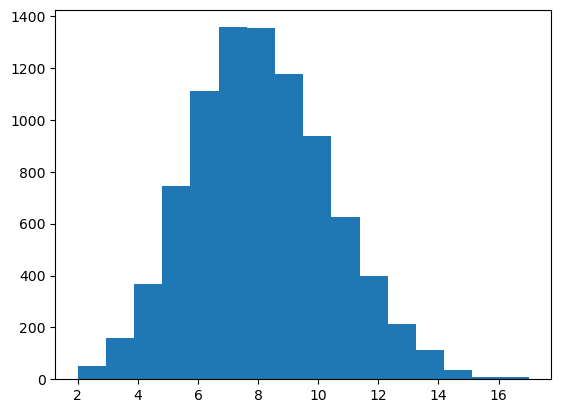

In [97]:
hist(lengths, bins=len(set(lengths)));

In [100]:
def pdist_good_turing_hack(counter, onecounter, base=1/26., prior=1e-8):
    """The probability of a word given the data from onecounter.
    For unknown words, we look at words encountered once from onecounter, 
    we choose the probability based on the length.
    Let's use the idea of the Hood-Turing method (we won't fully implement it here).
    prior is an additive factor that will make unknown words less likely.
    base is how much we reduce the probability for a word length greater than the maximum."""
    N = sum(list(counter.values()))
    N2 = sum(list(onecounter.values()))
    lengths = list(map(len, [w for w in onecounter if onecounter[w] == 1]))
    ones = Counter(lengths)
    longest = max(ones)
    return (lambda word: 
            counter[word] / N if (word in counter) 
            else prior * (ones[len(word)] / N2 or 
                          ones[longest] / N2 * base ** (len(word)-longest)))
P1w = pdist_good_turing_hack(COUNTS1, COUNTS)

In [104]:
#segment.cache.clear()
#segment('thisisatestofsegmentationofaverylongsequenceofwords')

In [105]:
from metaphone import doublemetaphone

In [102]:
!pip install metaphone

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13945 sha256=a989a1a5bdb2613cf028c8c87d26fe84085ec242ffc0f469b7b29bd7ec05b7bd
  Stored in directory: c:\users\александр\appdata\local\pip\cache\wheels\08\cb\f9\3ce2de290cd1b6f10dd8ed4795f3dec4a835b02d2514f9b9d3
Successfully built metaphone


In [106]:
print(doublemetaphone("Günther Graß"))
print(doublemetaphone("Günther Grass"))

('KN0RKRS', 'KNTRKRS')
('KN0RKRS', 'KNTRKRS')


In [107]:
print(doublemetaphone("schwartzenegger"))
print(doublemetaphone("shwortsineger"))

('XRTSNKR', 'XFRTSNKR')
('XRTSNJR', 'XRTSNKR')


In [108]:
print(doublemetaphone("xerox"))
print(doublemetaphone("zeeerux"))

('SRKS', '')
('SRKS', '')
